# **Classification of Fashion-MNIST Dataset Using PyTorch**
---

## **Overview**
>This code demonstrates the implementation of a simple neural network using PyTorch for classifying images from a subset of the Fashion-MNIST dataset. The pipeline includes data loading, preprocessing, dataset preparation, neural network creation, training, and evaluation. The Fashion-MNIST dataset consists of 28x28 grayscale images of clothing items, each labeled with one of 10 categories. The goal is to train the neural network to classify these images accurately.


---
## **Importing Libraries**
>- Import essential libraries for data handling, visualization, machine learning, and deep learning.
 - `pandas`: For data manipulation and reading CSV files.
 - `matplotlib.pyplot`: For plotting and visualizing the dataset.
 - `scikit-learn`: For splitting data into training and testing subsets.
 - `torch`: The main PyTorch library for building and training neural networks.
 - `torch.nn`: For defining the neural network architecture.
 - `torch.optim`: For optimization algorithms.
 - `torch.utils.data`: To handle datasets and create data loaders.
- **Key Action**: Sets a manual random seed (`42`) for reproducibility.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
torch.manual_seed(42)

---
## **Loading the Dataset**
>Loads the Fashion-MNIST dataset stored in a CSV file (fmnist_small.csv) into a pandas DataFrame.
 - Each row represents an image (pixel values) and its corresponding label (category).
 - The first column contains the label, while the remaining columns represent flattened pixel values (28x28 = 784).

In [ ]:
df = pd.read_csv("/content/fmnist_small.csv")

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,...,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,120,108,0,0,4,6,11,...,243,255,255,251,242,236,230,246,228,0,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,202,213,210,205,204,221,157,172,131,55,...,0,77,157,148,155,146,151,149,152,154,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,33,114,37,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,47,136,31,136,42,0,3,0,...,138,152,160,152,162,144,208,181,1,18,11,17,13,13,11,10,7,5,5,5,7,0,0,0,1,0,0,41,69,88,86,94,106,114,118,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,2,0,58,145,114,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,29,132,0,0,101,10,0,2,0,0,...,155,178,149,163,165,138,147,170,149,134,165,153,155,134,143,172,215,62,0,0,0,0,0,0,0,0,10,190,178,194,209,211,209,205,211,215,213,217,225,228,213,203,174,151,188,10,0,0,0,0


---
## **Visualizing the Data**
>- Visualizes the first 16 images in the dataset.
 - Reshapes each image from a flattened 784-pixel vector into a 28x28 matrix.
 - Displays the label (category) for each image above the corresponding plot.
- **Key Action**: Helps verify the data structure and gives an intuitive understanding of the dataset.

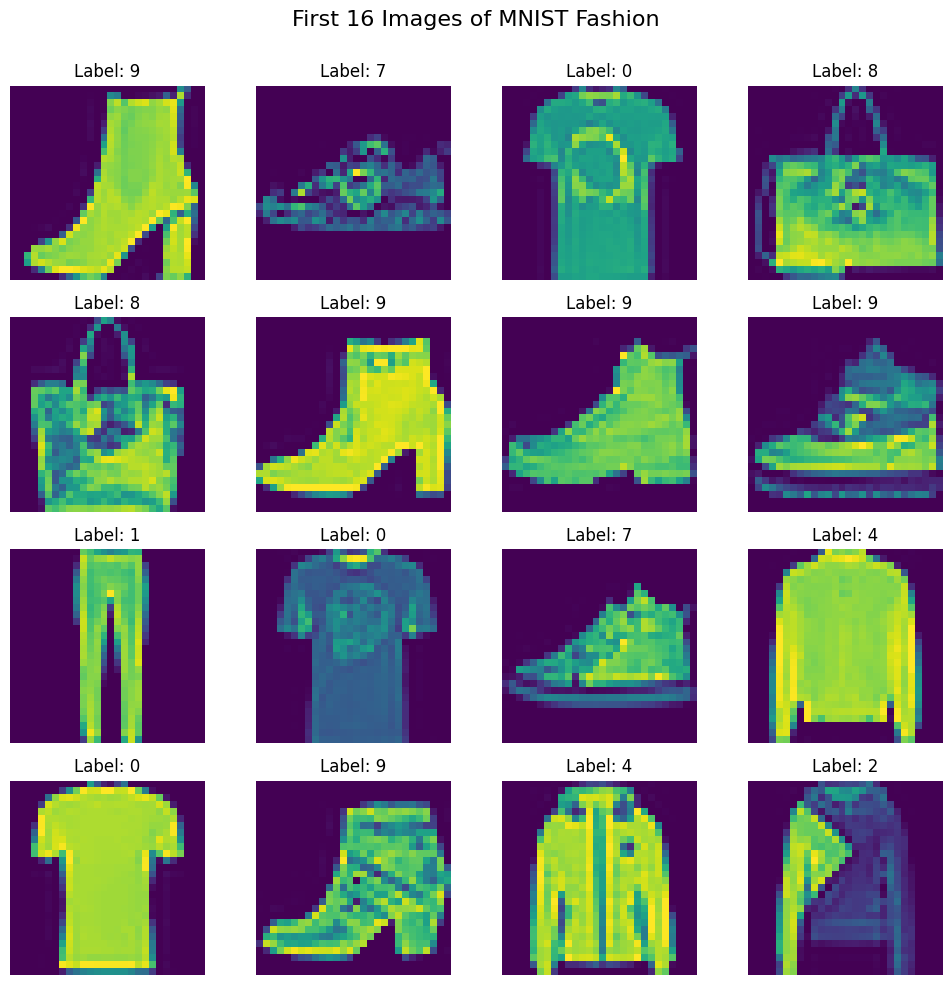

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images of MNIST Fashion\n", fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(df.iloc[i, 1:].values.reshape(28, 28))
    ax.set_title(f"Label: {df.iloc[i, 0]}")
    ax.axis("off")

plt.tight_layout()
plt.show();

---
## **Splitting and Normalizing the Data**
>- Separates features (X) and labels (y) from the DataFrame.
- Splits the dataset into training (80%) and testing (20%) subsets using train_test_split.
- Normalizes the pixel values by dividing by 255 (max value for grayscale pixels) to scale them to the [0, 1] range, which helps the model train effectively.

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

---
## **Defining a Custom Dataset**
>Defines a custom dataset class (FashionDataset) to handle the training and testing data in a PyTorch-friendly format.
 - Converts features and labels to PyTorch tensors.
 - Implements methods to get the size of the dataset (`__len__`) and retrieve specific data points (`__getitem__`).

In [ ]:
class FashionDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

---
## **Creating DataLoaders**
>Wraps the datasets into PyTorch `DataLoader` objects for efficient data batching and shuffling during training and testing.

In [ ]:
train_dataset = FashionDataset(X_train, y_train)
test_dataset = FashionDataset(X_test, y_test)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

---
## **Defining the Neural Network**
>- Defines the neural network architecture:
 - Input layer: Takes the 784-pixel vector.
 - Two hidden layers:
    - 128 neurons → ReLU activation.
    - 64 neurons → ReLU activation.
    - Output layer: 10 neurons (one for each class).
- Forward Method: Specifies how data flows through the network.

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.model(x)

---
## **Training the Model**
>- Sets training parameters (`epochs`, `learning_rate`).
- Initializes the model, loss function (`CrossEntropyLoss`), and optimizer (`SGD`).
- Trains the model:
 - For each batch, calculates loss, performs backpropagation, and updates weights.
- Prints the average loss for each epoch to monitor training progress.

In [ ]:
epochs = 100
learning_rate = 0.01

In [ ]:
model = NeuralNetwork(X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(epochs):
  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:
    optimizer.zero_grad()
    outputs = model(batch_features)
    loss = criterion(outputs, batch_labels)
    loss.backward()
    optimizer.step()
    total_epoch_loss += loss.item()

  print(f"Epoch {epoch+1}/{epochs}, Loss: {total_epoch_loss/len(train_loader)}")

Epoch 1/100, Loss: 2.2368171882629393
Epoch 2/100, Loss: 1.9528840390841167
Epoch 3/100, Loss: 1.4864923143386841
Epoch 4/100, Loss: 1.1698892108599346
Epoch 5/100, Loss: 0.9942735191186269
Epoch 6/100, Loss: 0.8960168067614237
Epoch 7/100, Loss: 0.8343262080351511
Epoch 8/100, Loss: 0.789007070461909
Epoch 9/100, Loss: 0.7555474547545115
Epoch 10/100, Loss: 0.7287200178702672
Epoch 11/100, Loss: 0.700073608358701
Epoch 12/100, Loss: 0.6826658533016841
Epoch 13/100, Loss: 0.6608437178532283
Epoch 14/100, Loss: 0.6402013136943181
Epoch 15/100, Loss: 0.6177361305554708
Epoch 16/100, Loss: 0.6091882650057475
Epoch 17/100, Loss: 0.5856802246967951
Epoch 18/100, Loss: 0.5769245492418608
Epoch 19/100, Loss: 0.564580753048261
Epoch 20/100, Loss: 0.5527976769208908
Epoch 21/100, Loss: 0.5441259907682737
Epoch 22/100, Loss: 0.5340593114495278
Epoch 23/100, Loss: 0.5224679175019264
Epoch 24/100, Loss: 0.5171100894610087
Epoch 25/100, Loss: 0.5065616236130397
Epoch 26/100, Loss: 0.500197076002756

---
## **Evaluating the Model**
>Evaluates the trained model on the test data.
- Disables gradient calculations for efficiency (`torch.no_grad`).
- Predicts the labels and calculates accuracy based on correct predictions.

In [ ]:
model.eval()

NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    outputs = model(batch_features)
    _, predicted = torch.max(outputs, 1)
    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()

print(f"Accuracy: {100 * correct / total:.3f}%")

Accuracy: 82.583%
